# Wind farm

In [1]:
import numpy as np
import sympy as sym
import pydae.build_cffi as db
from pydae.grid_bpu import bpu

In [2]:
zeta = 0.1 # 1.0/np.sqrt(2) 
H_v = 4.0 
WB = 2 *np.pi* 50;
R_v = 0.0
X_v = 0.3

Lt = X_v 
P_max = 1/Lt
fn = np.sqrt(WB*P_max/(2*H_v))/(2*np.pi)

Dp = 0;
K_i = (2*np.pi*fn)**2/(WB*P_max);
K_g = Dp*K_i;
K_p = (2*zeta*2*np.pi*fn - K_g)/(WB*P_max);

T_q = 1.0/(2*np.pi*10/2)
K_q = (1.0 - 0.0)/(1.05 - 0.95)
K_i_q = 1e-6

theta_red = 3.0/180*np.pi
V = 1.0
p_ref = 0.9
q_ref = 0.434616
v_ref = 1.0
T_q = 1.0/(2*np.pi*10/2)
T_q

0.03183098861837907

In [3]:
data = {
    "sys":{"name":"wind_farm","S_base":100e6, "K_p_agc":0.01,"K_i_agc":0.01},  
    "lines":[
        {"bus_j": "W1lv",  "bus_k":  "POI", "X_pu":0.001, "R_pu":0.0, "S_mva": 20000.0, 'monitor':True}
         ],
    "buses":[
            {"name":  "W1lv", "P_W":0.0, "Q_var":0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":   "POI", "P_W":0.0, "Q_var":0.0, "pos_x":   100.0, "pos_y":    0.0, "units": "m", "U_kV":66.0}
    ],
    "vsgs":[{"bus":"POI","S_n":100e6,"type":"vsg_co","R_v":0.01,"X_v":0.1, "T_v":0.1,"T_w":1,    
                "K_p":0.01,"T_p":0.1,"D":1.0,"v_ref":1.1,"p_c":0.0,"Droop":0.05,"K_q":0.01,
                "Omega_b":314.1592653589793,"omega_s":1.0,"K_sec":0.0,"K_delta":0.001},
            {"bus":"W1lv","type":"vsg_ll",'S_n':1e6,'F_n':50,'K_delta':0.0,
                 'R_v':R_v,'X_v':X_v,'K_p':K_p,'K_i':K_i,'K_g':K_g,'K_q':K_q,'T_q':T_q,'K_i_q':1e-6}     
]}

bpu_obj = bpu(data_input=data)

g_list = bpu_obj.dae['g'] 
h_dict = bpu_obj.dae['h_dict']
f_list = bpu_obj.dae['f']
x_list = bpu_obj.dae['x']
params_dict = bpu_obj.dae['params_dict']


sys_dict = {'name':'wind_farm',
       'params_dict':params_dict,
       'f_list':f_list,
       'g_list':g_list,
       'x_list':x_list,
       'y_ini_list':bpu_obj.dae['y_ini'],
       'y_run_list':bpu_obj.dae['y_run'],
       'u_run_dict':bpu_obj.dae['u_run_dict'],
       'u_ini_dict':bpu_obj.dae['u_ini_dict'],
       'h_dict':h_dict}

bldr = db.builder(sys_dict);
bldr.build()

![](./png/wind_farm.png)

In [3]:



data = {
    "sys":{"name":"wind_farm","S_base":100e6, "K_p_agc":0.01,"K_i_agc":0.01},  
    "lines":[
        {"bus_j": "W1lv",  "bus_k":  "W1mv", "X_pu":0.01, "R_pu":0.06, "S_mva": 2.5},
        {"bus_j": "W2lv",  "bus_k":  "W2mv", "X_pu":0.01, "R_pu":0.06, "S_mva": 2.5},
        {"bus_j": "W1mv",  "bus_k": "POImv", "R_km":0.26, "X_km":0.12, "C_muF_km":0.25, "km":0.5},
        {"bus_j": "W2mv",  "bus_k": "POImv", "R_km":0.26, "X_km":0.12, "C_muF_km":0.25, "km":0.5},
        {"bus_j": "W2lv",  "bus_k":  "STmv", "X_pu":0.01, "R_pu":0.06, "S_mva": 5.0},
        {"bus_j": "STlv",  "bus_k": "POImv", "R_km":0.26, "X_km":0.12, "C_muF_km":0.25, "km":0.5},
        {"bus_j": "POI",   "bus_k": "POImv", "X_pu":0.01, "R_pu":0.05, "S_mva":10.0},
        {"bus_j": "POI",   "bus_k":  "GRID", "R_km":0.26, "X_km":0.12, "C_muF_km":0.25, "km":50.0, 'monitor':True}
         ],
    "buses":[
            {"name":  "W1lv", "P_W":0.0, "Q_var":0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "W2lv", "P_W":0.0, "Q_var":0.0, "pos_x": -1000.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "STlv", "P_W":0.0, "Q_var":0.0, "pos_x":  -500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "W1mv", "P_W":0.0, "Q_var":0.0, "pos_x": -1500.0, "pos_y":  180.0, "units": "m", "U_kV":20.0},
            {"name":  "W2mv", "P_W":0.0, "Q_var":0.0, "pos_x": -1000.0, "pos_y":  180.0, "units": "m", "U_kV":20.0},
            {"name":  "STmv", "P_W":0.0, "Q_var":0.0, "pos_x":     0.0, "pos_y":    0.0, "units": "m", "U_kV":20.0},       
            {"name": "POImv", "P_W":0.0, "Q_var":0.0, "pos_x":     0.0, "pos_y":    0.0, "units": "m", "U_kV":20.0},
            {"name":   "POI", "P_W":0.0, "Q_var":0.0, "pos_x":   100.0, "pos_y":    0.0, "units": "m", "U_kV":66.0},
            {"name":  "GRID", "P_W":0.0, "Q_var":0.0, "pos_x":   500.0, "pos_y":    0.0, "units": "m", "U_kV":66.0}
    ],
    "vsgs":[{"bus":"GRID","S_n":50e6,"type":"vsg_co","R_v":0.01,"X_v":0.1, "T_v":0.1,"T_w":1,    
                "K_p":0.01,"T_p":0.1,"D":1.0,"v_ref":1.1,"p_c":0.0,"Droop":0.05,"K_q":0.01,
                "Omega_b":314.1592653589793,"omega_s":1.0,"K_sec":0.0,"K_delta":0.001},
            {"bus":"W1lv","type":"vsg_ll",'S_n':1e6,'F_n':50,'K_delta':0.0,
                 'R_v':R_v,'X_v':X_v,'K_p':K_p,'K_i':K_i,'K_g':K_g,'K_q':K_q,'T_q':T_q,'K_i_q':1e-6},
            {"bus":"W2lv","type":"vsg_ll",'S_n':1e6,'F_n':50,'K_delta':0.0,
                 'R_v':R_v,'X_v':X_v,'K_p':K_p,'K_i':K_i,'K_g':K_g,'K_q':K_q,'T_q':T_q,'K_i_q':1e-6},            
]}

In [4]:
SB = 100
#---------------------
SBwf1 = 75/2/2;
SBwf2 = 50/2;
#---------------------
SBwf  = 4*SBwf1+4*SBwf2;
SBred = 4*SBwf;
#---------------------
Xt = 0.0552; 
Zc = (0.02 + 1j*0.0248);
Xtp = 2*0.06 / (SBwf/100);
Zg = (1/10+1j) / (SBred/100); 
#---------------------
# Transformadores de los Generadores
#---------------------
Xt1 = Xt / (SBwf1/100);
Xt2 = Xt / (SBwf2/100);
#---------------------
# Colector
#---------------------
Zc1 = 1.0*Zc / (SBwf1/100);
Zc2 = 1.0*Zc / (SBwf2/100);
#---------------------

Rc1 = Zc1.real
Xc1 = Zc1.imag
Rc2 = Zc2.real
Xc2 = Zc2.imag
Rg = Zg.real
Xg = Zg.imag

data = {
    "sys":{"name":"wind_farm","S_base":100e6, "K_p_agc":0.01,"K_i_agc":0.01},  
    "lines":[
        {"bus_j": "01", "bus_k":"02", "S_mva":SB, "R_pu":  0.00000, "X_pu": Xt1},      
        {"bus_j": "03", "bus_k":"04", "S_mva":SB, "R_pu":  0.00000, "X_pu": Xt1},      
        {"bus_j": "05", "bus_k":"06", "S_mva":SB, "R_pu":  0.00000, "X_pu": Xt1},      
        {"bus_j": "07", "bus_k":"08", "S_mva":SB, "R_pu":  0.00000, "X_pu": Xt1},      
        {"bus_j": "02", "bus_k":"04", "S_mva":SB, "R_pu":      Rc1, "X_pu": Xc1},     
        {"bus_j": "04", "bus_k":"06", "S_mva":SB, "R_pu":      Rc1, "X_pu": Xc1},     
        {"bus_j": "06", "bus_k":"08", "S_mva":SB, "R_pu":      Rc1, "X_pu": Xc1},     
        {"bus_j": "08", "bus_k":"17", "S_mva":SB, "R_pu":      Rc1, "X_pu": Xc1},     
        {"bus_j": "09", "bus_k":"10", "S_mva":SB, "R_pu":  0.00000, "X_pu": Xt2},        
        {"bus_j": "11", "bus_k":"12", "S_mva":SB, "R_pu":  0.00000, "X_pu": Xt2},        
        {"bus_j": "13", "bus_k":"14", "S_mva":SB, "R_pu":  0.00000, "X_pu": Xt2},        
        {"bus_j": "15", "bus_k":"16", "S_mva":SB, "R_pu":  0.00000, "X_pu": Xt2},        
        {"bus_j": "10", "bus_k":"12", "S_mva":SB, "R_pu":      Rc2, "X_pu": Xc2},     
        {"bus_j": "12", "bus_k":"14", "S_mva":SB, "R_pu":      Rc2, "X_pu": Xc2},     
        {"bus_j": "14", "bus_k":"16", "S_mva":SB, "R_pu":      Rc2, "X_pu": Xc2},     
        {"bus_j": "16", "bus_k":"17", "S_mva":SB, "R_pu":      Rc2, "X_pu": Xc2},     
        {"bus_j": "17", "bus_k":"18", "S_mva":SB, "R_pu":  0.00000, "X_pu": Xtp},       
        {"bus_j": "18", "bus_k":"19", "S_mva":SB, "R_pu":       Rg, "X_pu":  Xg},   
         ],   
    "buses":[
            {"name":  "01", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "02", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "03", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "04", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "05", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "06", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "07", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "08", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "09", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "10", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "11", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "12", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "13", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "14", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "15", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "16", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "17", "P_W": 0.0, "Q_var":  1.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "18", "P_W":-2.5, "Q_var":-0.05, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
            {"name":  "19", "P_W": 0.0, "Q_var":  0.0, "pos_x": -1500.0, "pos_y":  200.0, "units": "m", "U_kV":0.69},
    ],
    "vsgs":[{"bus":"19","S_n":500e6,"type":"vsg_co","R_v":0.01,"X_v":0.1, "T_v":0.1,"T_w":1,    
                "K_p":0.01,"T_p":0.1,"D":1.0,"v_ref":1.02,"p_c":0.0,"Droop":0.05,"K_q":0.01,
                "Omega_b":314.1592653589793,"omega_s":1.0,"K_sec":0.0,"K_delta":0.001},
            {"bus":"01","type":"vsg_ll",'S_n':SBwf1*1e6,'F_n':50,'K_delta':0.0,
                 'R_v':R_v,'X_v':X_v,'K_p':K_p,'K_i':K_i,'K_g':K_g,'K_q':K_q,'T_q':T_q,'K_i_q':1e-6},
            {"bus":"03","type":"vsg_ll",'S_n':SBwf1*1e6,'F_n':50,'K_delta':0.0,
                 'R_v':R_v,'X_v':X_v,'K_p':K_p,'K_i':K_i,'K_g':K_g,'K_q':K_q,'T_q':T_q,'K_i_q':1e-6},  
            {"bus":"05","type":"vsg_ll",'S_n':SBwf1*1e6,'F_n':50,'K_delta':0.0,
                 'R_v':R_v,'X_v':X_v,'K_p':K_p,'K_i':K_i,'K_g':K_g,'K_q':K_q,'T_q':T_q,'K_i_q':1e-6},
            {"bus":"07","type":"vsg_ll",'S_n':SBwf1*1e6,'F_n':50,'K_delta':0.0,
                 'R_v':R_v,'X_v':X_v,'K_p':K_p,'K_i':K_i,'K_g':K_g,'K_q':K_q,'T_q':T_q,'K_i_q':1e-6},
            {"bus":"09","type":"vsg_ll",'S_n':SBwf2*1e6,'F_n':50,'K_delta':0.0,
                 'R_v':R_v,'X_v':X_v,'K_p':K_p,'K_i':K_i,'K_g':K_g,'K_q':K_q,'T_q':T_q,'K_i_q':1e-6},
            {"bus":"11","type":"vsg_ll",'S_n':SBwf2*1e6,'F_n':50,'K_delta':0.0,
                 'R_v':R_v,'X_v':X_v,'K_p':K_p,'K_i':K_i,'K_g':K_g,'K_q':K_q,'T_q':T_q,'K_i_q':1e-6},  
            {"bus":"13","type":"vsg_ll",'S_n':SBwf2*1e6,'F_n':50,'K_delta':0.0,
                 'R_v':R_v,'X_v':X_v,'K_p':K_p,'K_i':K_i,'K_g':K_g,'K_q':K_q,'T_q':T_q,'K_i_q':1e-6},
            {"bus":"15","type":"vsg_ll",'S_n':SBwf2*1e6,'F_n':50,'K_delta':0.0,
                 'R_v':R_v,'X_v':X_v,'K_p':K_p,'K_i':K_i,'K_g':K_g,'K_q':K_q,'T_q':T_q,'K_i_q':1e-6}
]}

In [11]:
data

{'sys': {'name': 'wind_farm',
  'S_base': 100000000.0,
  'K_p_agc': 0.01,
  'K_i_agc': 0.01},
 'lines': [{'bus_j': '01',
   'bus_k': '02',
   'S_mva': 100,
   'R_pu': 0.0,
   'X_pu': 0.2944},
  {'bus_j': '03', 'bus_k': '04', 'S_mva': 100, 'R_pu': 0.0, 'X_pu': 0.2944},
  {'bus_j': '05', 'bus_k': '06', 'S_mva': 100, 'R_pu': 0.0, 'X_pu': 0.2944},
  {'bus_j': '07', 'bus_k': '08', 'S_mva': 100, 'R_pu': 0.0, 'X_pu': 0.2944},
  {'bus_j': '02',
   'bus_k': '04',
   'S_mva': 100,
   'R_pu': 0.10666666666666667,
   'X_pu': 0.13226666666666667},
  {'bus_j': '04',
   'bus_k': '06',
   'S_mva': 100,
   'R_pu': 0.10666666666666667,
   'X_pu': 0.13226666666666667},
  {'bus_j': '06',
   'bus_k': '08',
   'S_mva': 100,
   'R_pu': 0.10666666666666667,
   'X_pu': 0.13226666666666667},
  {'bus_j': '08',
   'bus_k': '17',
   'S_mva': 100,
   'R_pu': 0.10666666666666667,
   'X_pu': 0.13226666666666667},
  {'bus_j': '09', 'bus_k': '10', 'S_mva': 100, 'R_pu': 0.0, 'X_pu': 0.2208},
  {'bus_j': '11', 'bus_k': '

In [5]:
bpu_obj = bpu(data_input=data)

g_list = bpu_obj.dae['g'] 
h_dict = bpu_obj.dae['h_dict']
f_list = bpu_obj.dae['f']
x_list = bpu_obj.dae['x']
params_dict = bpu_obj.dae['params_dict']


sys_dict = {'name':'wf19',
       'params_dict':params_dict,
       'f_list':f_list,
       'g_list':g_list,
       'x_list':x_list,
       'y_ini_list':bpu_obj.dae['y_ini'],
       'y_run_list':bpu_obj.dae['y_run'],
       'u_run_dict':bpu_obj.dae['u_run_dict'],
       'u_ini_dict':bpu_obj.dae['u_ini_dict'],
       'h_dict':h_dict}

bldr = db.builder(sys_dict);
bldr.build()

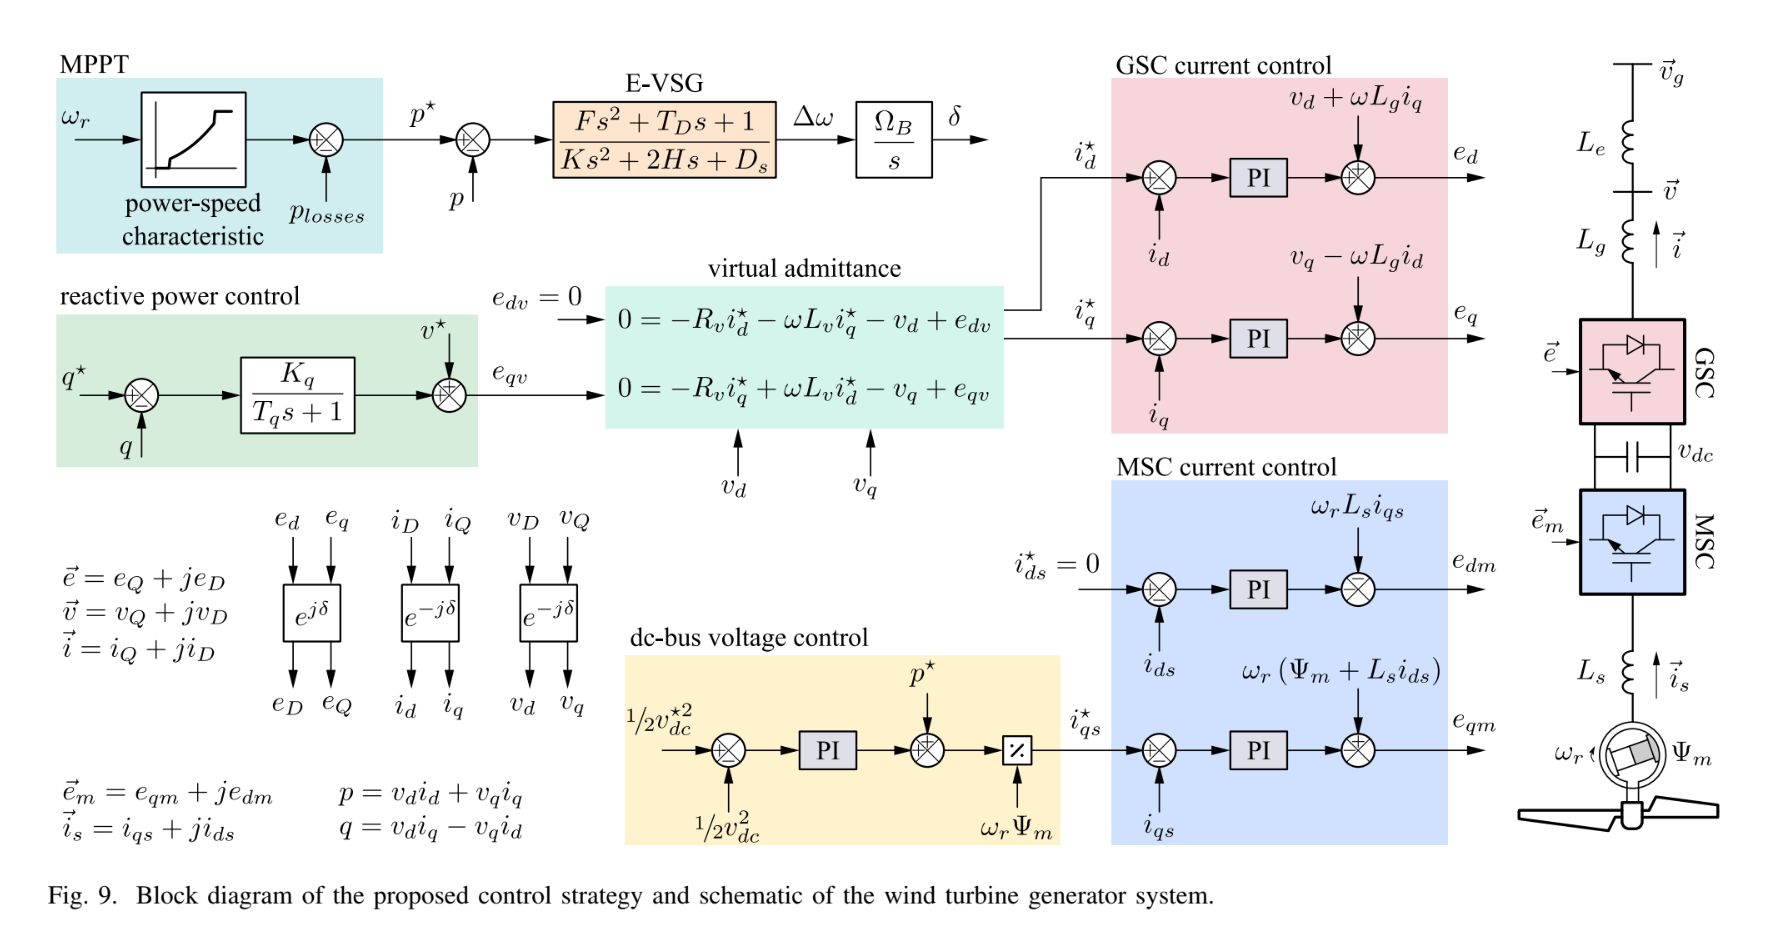

In [25]:
print(bldr.source)

void f_ini_eval(double *out,double *x,double *y,double *u,double *p,double Dt){

out[0] = -p[82]*x[0] + p[75]*(y[38] - y[84]);
out[1] = -x[3] + y[43];
out[2] = (p[78]*(-y[42] + u[41]) - x[2] + u[38])/p[79];
out[3] = (y[39]*(p[81]*y[39] + y[36]*sin(x[0] - y[37])) + y[40]*(p[81]*y[40] + y[36]*cos(x[0] - y[37])) - x[3])/p[85];
out[4] = (u[39] - x[4])/p[86];
out[5] = 6.2831853071795862*p[88]*(p[90]*(-y[46] + u[42]) - y[84] + x[6] + 1.0) - p[89]*x[5];
out[6] = -p[92]*(p[90]*(-y[46] + u[42]) + x[6]) + p[91]*(-y[46] + u[42]);
out[7] = 1.0*(-x[7] + y[47] - u[43])/p[96];
out[8] = -x[8];
out[9] = 6.2831853071795862*p[99]*(p[101]*(-y[51] + u[44]) - y[84] + x[10] + 1.0) - p[100]*x[9];
out[10] = -p[103]*(p[101]*(-y[51] + u[44]) + x[10]) + p[102]*(-y[51] + u[44]);
out[11] = 1.0*(-x[11] + y[52] - u[45])/p[107];
out[12] = -x[12];
out[13] = 6.2831853071795862*p[110]*(p[112]*(-y[56] + u[46]) - y[84] + x[14] + 1.0) - p[111]*x[13];
out[14] = -p[114]*(p[112]*(-y[56] + u[46]) + x[14]) + p[113]*(-y[56] + u[4

In [8]:
%---------------------------------------------------------------------------------------
% From, To, SB,	VB,     FB,	length,   prim/seq volt,    R/km,       X/km,       b/km,       tap ratio,  phase shift,   Imax,    Pmax,   Smax,    u 
Line.con = [ ...
   1    2   SB  1       FB  0         0.00              0.00000	    Xt1         0.00000     0.00000     0.00000        0.000    0.000   0.000    1
   3    4   SB  1       FB  0         0.00              0.00000	    Xt1         0.00000     0.00000     0.00000        0.000    0.000   0.000    1
   5    6   SB  1       FB  0         0.00              0.00000	    Xt1         0.00000     0.00000     0.00000        0.000    0.000   0.000    1
   7    8   SB  1       FB  0         0.00              0.00000	    Xt1         0.00000     0.00000     0.00000        0.000    0.000   0.000    1
   2    4   SB  1       FB  0         0.00              real(Zc1)   imag(Zc1)   0.00000     0.00000     0.00000        0.000    0.000   0.000    1
   4    6   SB  1       FB  0         0.00              real(Zc1)   imag(Zc1)   0.00000     0.00000     0.00000        0.000    0.000   0.000    1
   6    8   SB  1       FB  0         0.00              real(Zc1)   imag(Zc1)   0.00000     0.00000     0.00000        0.000    0.000   0.000    1
   8    17  SB  1       FB  0         0.00              real(Zc1)   imag(Zc1)   0.00000     0.00000     0.00000        0.000    0.000   0.000    1
   9   10   SB  1       FB  0         0.00              0.00000	    Xt2         0.00000     0.00000     0.00000        0.000    0.000   0.000    1
  11   12   SB  1       FB  0         0.00              0.00000	    Xt2         0.00000     0.00000     0.00000        0.000    0.000   0.000    1
  13   14   SB  1       FB  0         0.00              0.00000	    Xt2         0.00000     0.00000     0.00000        0.000    0.000   0.000    1
  15   16   SB  1       FB  0         0.00              0.00000	    Xt2         0.00000     0.00000     0.00000        0.000    0.000   0.000    1
  10   12   SB  1       FB  0         0.00              real(Zc2)   imag(Zc2)   0.00000     0.00000     0.00000        0.000    0.000   0.000    1
  12   14   SB  1       FB  0         0.00              real(Zc2)   imag(Zc2)   0.00000     0.00000     0.00000        0.000    0.000   0.000    1
  14   16   SB  1       FB  0         0.00              real(Zc2)   imag(Zc2)   0.00000     0.00000     0.00000        0.000    0.000   0.000    1
  16   17   SB  1       FB  0         0.00              real(Zc2)   imag(Zc2)   0.00000     0.00000     0.00000        0.000    0.000   0.000    1
  17    18  SB  1       FB  0         0.00              0.00000	    Xtp         0.00000     0.00000     0.00000        0.000    0.000   0.000    1
  18    19  SB  1       FB  0         0.00              real(Zg)	imag(Zg)    0.00000     0.00000     0.00000        0.000    0.000   0.000    1
  ];
%---------------------------------------------------------------------------------------

-2*H_W1lv*(F_W1lv*(-p_W1lv + p_ref_W1lv) + x_v_W1lv)/K_W1lv + T_d_W1lv*(-p_W1lv + p_ref_W1lv) + x_v_W1lv

In [ ]:
%---------------------
% Parametros obtenidos de Kundur pag. 813 y Sauer-Pai pag. 278
%---------------------
SB = 100;
FB = 50;
%-----------------------------------------------------------------


%---------------------
SBwf1 = 75/2/2;
SBwf2 = 50/2;
%---------------------
SBwf  = 4*SBwf1+4*SBwf2;
SBred = 4*SBwf;
%---------------------
Xt = 0.0552; 
Zc = (0.02 + 1i*0.0248);
Xtp = 2*0.06 / (SBwf/100);
Zg = (1/10+1i) / (SBred/100); 
%---------------------
% Transformadores de los Generadores
%---------------------
Xt1 = Xt / (SBwf1/100);
Xt2 = Xt / (SBwf2/100);
%---------------------
% Colector
%---------------------
Zc1 = 1.0*Zc / (SBwf1/100);
Zc2 = 1.0*Zc / (SBwf2/100);
%---------------------


        {"bus_j": "W1mv",  "bus_k": "POImv", "R_km":0.26, "X_km":0.12, "C_muF_km":0.25, "km":0.5},
    
        {"bus_j": "W2lv",  "bus_k":  "W2mv", "X_pu":0.01, "R_pu":0.06, "S_mva": 2.5},        
%---------------------------------------------------------------------------------------
% From, To, SB,	VB,     FB,	length,   prim/seq volt,    R/km,       X/km,       b/km,       tap ratio,  phase shift,   Imax,    Pmax,   Smax,    u 
Line.con = [ ...
    
  ];
%---------------------------------------------------------------------------------------


%---------------------------------------------------------------------------------------
% Bus,	SB,	VB,     FB,	g,          b,      u    	% resistencia y capacitor (valores positivos)
Shunt.con = [ ...
  18    SB	1       FB	0.00000     0.5    1
 ];
%---------------------------------------------------------------------------------------

%---------------------------------------------------------------------------------------
% Bus,	SB,	VB,	V0,     Phi0,           Qmax,	Qmin,	Vmax,	Vmin,	Pg0, 	Loss part,	z,	u  
SW.con = [ ...
   19   SBred  1	1.020   0/180*pi        0.000 	0.000   0.000   0.000   000.00	0         	0   1
 ];
%---------------------------------------------------------------------------------------


%---------------------------------------------------------------------------------------
% Bus,	SB,	VB,     P0,     V0,     Qmax,	Qmin,	Vmax,	Vmin,	Loss part,  u  
PV.con = [ ...
    1   SBwf1  1      0.80  1.00     0.000   0.000   0.000   0.000	0           1
    3   SBwf1  1      0.80  1.00     0.000   0.000   0.000   0.000	0           1
    5   SBwf1  1      0.80  1.00     0.000   0.000   0.000   0.000	0           1
    7   SBwf1  1      0.80  1.00     0.000   0.000   0.000   0.000	0           1
    9   SBwf2  1      0.80  1.00     0.000   0.000   0.000   0.000	0           1
   11   SBwf2  1      0.80  1.00     0.000   0.000   0.000   0.000	0           1
   13   SBwf2  1      0.80  1.00     0.000   0.000   0.000   0.000	0           1
   15   SBwf2  1      0.80  1.00     0.000   0.000   0.000   0.000	0           1
 ];
%---------------------------------------------------------------------------------------


%---------------------------------------------------------------------------------------
% Bus,	SB,	VB,     P,   	Q,      Vmax,	Vmin,	con to imped,	u
PQ.con = [ ...
   18   SB  1       2.5     0.05    0.000   0.000   0               1
   17   SB  1       0.00   -1.00    0.000   0.000   0               1
    ];
%---------------------------------------------------------------------------------------
%---------------------------------------------------------------------------------------
PQ.kpz = 0;
PQ.kpi = 0;
PQ.kpp = 1;
%-----------------------------------
PQ.kqz = 0;
PQ.kqi = 0;
PQ.kqp = 1;
%---------------------------------------------------------------------------------------

In [12]:
for it in range(19):
    print(it+1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
